Available Companies:
1. A
2. AA
3. AAA
4. AAAA
5. AAAU
6. AACB
7. AACBR
8. AACBU
9. AACG
10. AACI
11. AALG
12. AAM
13. AAM.U
14. AAM.WS
15. AAME
16. AAMI
17. AAOI
18. AAON
19. AAP
20. AAPB
21. ABLLL
22. ABLLW
23. ABLS
24. ABLV
25. ABLVW
26. ABRpF
27. ABSI
28. ABT
29. ABTS
30. ABUS
31. ACES
32. ACET
33. ACFN
34. ACGL
35. ACGLN
36. ACNT
37. ACOG
38. ACON
39. ACONW
40. ACP
41. ACVF
42. ACVT
43. ACWI
44. ACWV
45. ACWX
46. ADN
47. ADNT
48. ADNWW
49. ADP
50. ADPT
51. ADVWW
52. ADX
53. ADXN
54. AEBI
55. AEE
56. AFG
57. AFGB
58. AFGC
59. AFGD
60. AFGE
61. AFIF
62. AFIX
63. AFJK
64. AFJKR
65. AFJKU
66. AGMpD
67. AGMpE
68. AGMpF
69. AGMpG
70. AGNC
71. AGNCM
72. AGNCN
73. AGNCO
74. AGNCP
75. AGNG
76. AHTpG
77. AHTpH
78. AHTpI
79. AHYB
80. AI
81. AIN
82. AINP
83. AIO
84. AIOO
85. AIOT
86. AISP
87. AISPW
88. AIT
89. AIV
90. AIVC
91. AKR
92. AKRO
93. AKTX
94. AL
95. ALAB
96. ALE
97. ALEC
98. ALEX
99. ALF
100. ALFUU
101. ALRM
102. ALRS
103. ALSN
104. ALT
105. ALTG
106. ALTGpA
107. ALTI
108. ALTL
109.

c:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_


--- Previous 10 Days Predicted Stock Prices for A ---
      Date  Predicted Close
2025-10-16       113.258016
2025-10-17       112.251760
2025-10-18       115.873067
2025-10-19       119.262396
2025-10-20       120.033490
2025-10-21       119.787941
2025-10-22       119.364119
2025-10-23       119.013259
2025-10-24       118.429631
2025-10-25       114.694789

--- Next 10 Days Predicted Stock Prices for A ---
      Date  Predicted Close
2025-10-26       113.394934
2025-10-27       113.132581
2025-10-28       112.768131
2025-10-29       112.643328
2025-10-30       111.796977
2025-10-31       112.020409
2025-11-01       111.840172
2025-11-02       111.721021
2025-11-03       111.446910
2025-11-04       111.072634


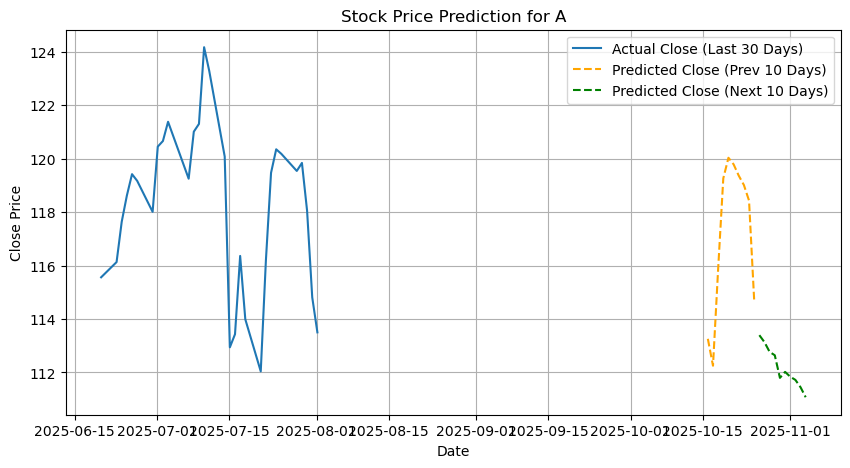

In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime, timedelta

# --- CONFIG ---
FOLDER_PATH = r"C:\Users\asus\Documents\STOCKS\all_companies_csv"

# --- STEP 1: List available company files ---
def list_companies(folder_path):
    files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    companies = [os.path.splitext(f)[0] for f in files]
    return companies

# --- STEP 2: Load company data ---
def load_company_data(company_name):
    file_path = os.path.join(FOLDER_PATH, f"{company_name}.csv")
    df = pd.read_csv(file_path)
    if 'timestamp' in df.columns:
        df['Date'] = pd.to_datetime(df['timestamp'], unit='ms')
    elif 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
    else:
        raise ValueError("CSV must have 'timestamp' or 'Date' column")
    df = df.sort_values('Date')
    df.set_index('Date', inplace=True)
    return df

# --- STEP 3: Train SARIMA model and make predictions ---
def predict_stock(df, company_name):
    if 'close' not in df.columns:
        raise ValueError("CSV must contain a 'close' column with closing prices.")

    data = df['close']

    # Fit SARIMA model
    model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7), enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit(disp=False)

    current_date = datetime.now().date()

    # Predict previous 10 days
    prev_10_days = pd.date_range(end=current_date - timedelta(days=1), periods=10)
    prev_forecast = results.get_prediction(start=len(data)-10, end=len(data)-1)
    prev_pred = prev_forecast.predicted_mean

    # Predict next 10 days
    next_10_days = pd.date_range(start=current_date, periods=10)
    next_forecast = results.get_forecast(steps=10)
    next_pred = next_forecast.predicted_mean

    # Print previous 10 days prediction
    print(f"\n--- Previous 10 Days Predicted Stock Prices for {company_name} ---")
    prev_df = pd.DataFrame({'Date': prev_10_days, 'Predicted Close': prev_pred.values})
    print(prev_df.to_string(index=False))

    # Print next 10 days prediction
    print(f"\n--- Next 10 Days Predicted Stock Prices for {company_name} ---")
    next_df = pd.DataFrame({'Date': next_10_days, 'Predicted Close': next_pred.values})
    print(next_df.to_string(index=False))

    # Plot results
    plt.figure(figsize=(10, 5))
    plt.plot(data[-30:], label='Actual Close (Last 30 Days)')
    plt.plot(prev_df['Date'], prev_df['Predicted Close'], label='Predicted Close (Prev 10 Days)', color='orange', linestyle='--')
    plt.plot(next_df['Date'], next_df['Predicted Close'], label='Predicted Close (Next 10 Days)', color='green', linestyle='--')
    plt.title(f"Stock Price Prediction for {company_name}")
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid()
    plt.show()

# --- MAIN EXECUTION ---
if __name__ == "__main__":
    companies = list_companies(FOLDER_PATH)
    if not companies:
        print("No CSV files found in the specified folder.")
    else:
        print("Available Companies:")
        for i, company in enumerate(companies, start=1):
            print(f"{i}. {company}")

        user_input = input("\nEnter the company name you want to analyze (case-sensitive): ").strip()

        if user_input not in companies:
            print(f"\nError: '{user_input}' not found in the folder. Please enter a valid company name.")
        else:
            df = load_company_data(user_input)
            predict_stock(df, user_input)


Available Companies:
1. A
2. AA
3. AAA
4. AAAA
5. AAAU
6. AACB
7. AACBR
8. AACBU
9. AACG
10. AACI
11. AALG
12. AAM
13. AAM.U
14. AAM.WS
15. AAME
16. AAMI
17. AAOI
18. AAON
19. AAP
20. AAPB
21. ABLLL
22. ABLLW
23. ABLS
24. ABLV
25. ABLVW
26. ABRpF
27. ABSI
28. ABT
29. ABTS
30. ABUS
31. ACES
32. ACET
33. ACFN
34. ACGL
35. ACGLN
36. ACNT
37. ACOG
38. ACON
39. ACONW
40. ACP
41. ACVF
42. ACVT
43. ACWI
44. ACWV
45. ACWX
46. ADN
47. ADNT
48. ADNWW
49. ADP
50. ADPT
51. ADVWW
52. ADX
53. ADXN
54. AEBI
55. AEE
56. AFG
57. AFGB
58. AFGC
59. AFGD
60. AFGE
61. AFIF
62. AFIX
63. AFJK
64. AFJKR
65. AFJKU
66. AGMpD
67. AGMpE
68. AGMpF
69. AGMpG
70. AGNC
71. AGNCM
72. AGNCN
73. AGNCO
74. AGNCP
75. AGNG
76. AHTpG
77. AHTpH
78. AHTpI
79. AHYB
80. AI
81. AIN
82. AINP
83. AIO
84. AIOO
85. AIOT
86. AISP
87. AISPW
88. AIT
89. AIV
90. AIVC
91. AKR
92. AKRO
93. AKTX
94. AL
95. ALAB
96. ALE
97. ALEC
98. ALEX
99. ALF
100. ALFUU
101. ALRM
102. ALRS
103. ALSN
104. ALT
105. ALTG
106. ALTGpA
107. ALTI
108. ALTL
109.

c:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA model fitted successfully.

--- Last 10 Available Trading Days (Actual) for A ---
               Date  Close Price
2025-07-21 04:00:00       112.04
2025-07-22 04:00:00       116.19
2025-07-23 04:00:00       119.47
2025-07-24 04:00:00       120.35
2025-07-25 04:00:00       120.18
2025-07-28 04:00:00       119.54
2025-07-29 04:00:00       119.84
2025-07-30 04:00:00       118.05
2025-07-31 04:00:00       114.81
2025-08-01 04:00:00       113.50

--- Next 10 Days Forecasted Stock Prices for A (Starting Tomorrow) ---
      Date  Predicted Close
2025-10-27       113.394934
2025-10-28       113.132581
2025-10-29       112.768131
2025-10-30       112.643328
2025-10-31       111.796977
2025-11-01       112.020409
2025-11-02       111.840172
2025-11-03       111.721021
2025-11-04       111.446910
2025-11-05       111.072634


c:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


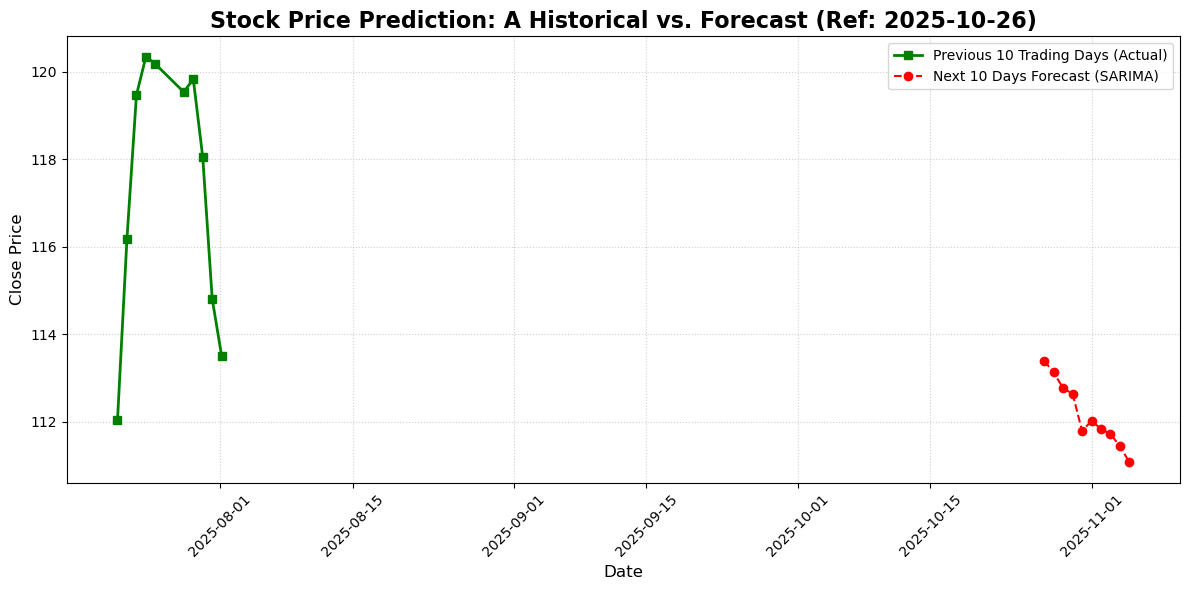

Available Companies:
1. A
2. AA
3. AAA
4. AAAA
5. AAAU
6. AACB
7. AACBR
8. AACBU
9. AACG
10. AACI
11. AALG
12. AAM
13. AAM.U
14. AAM.WS
15. AAME
16. AAMI
17. AAOI
18. AAON
19. AAP
20. AAPB
21. ABLLL
22. ABLLW
23. ABLS
24. ABLV
25. ABLVW
26. ABRpF
27. ABSI
28. ABT
29. ABTS
30. ABUS
31. ACES
32. ACET
33. ACFN
34. ACGL
35. ACGLN
36. ACNT
37. ACOG
38. ACON
39. ACONW
40. ACP
41. ACVF
42. ACVT
43. ACWI
44. ACWV
45. ACWX
46. ADN
47. ADNT
48. ADNWW
49. ADP
50. ADPT
51. ADVWW
52. ADX
53. ADXN
54. AEBI
55. AEE
56. AFG
57. AFGB
58. AFGC
59. AFGD
60. AFGE
61. AFIF
62. AFIX
63. AFJK
64. AFJKR
65. AFJKU
66. AGMpD
67. AGMpE
68. AGMpF
69. AGMpG
70. AGNC
71. AGNCM
72. AGNCN
73. AGNCO
74. AGNCP
75. AGNG
76. AHTpG
77. AHTpH
78. AHTpI
79. AHYB
80. AI
81. AIN
82. AINP
83. AIO
84. AIOO
85. AIOT
86. AISP
87. AISPW
88. AIT
89. AIV
90. AIVC
91. AKR
92. AKRO
93. AKTX
94. AL
95. ALAB
96. ALE
97. ALEC
98. ALEX
99. ALF
100. ALFUU
101. ALRM
102. ALRS
103. ALSN
104. ALT
105. ALTG
106. ALTGpA
107. ALTI
108. ALTL
109.

c:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_


--- Previous 10 Days Predicted Stock Prices for AA ---
      Date  Predicted Close
2025-10-17        30.050049
2025-10-18        31.047713
2025-10-19        31.855190
2025-10-20        32.052886
2025-10-21        31.694013
2025-10-22        31.118046
2025-10-23        30.429841
2025-10-24        30.343605
2025-10-25        30.325373
2025-10-26        30.030922

--- Next 10 Days Predicted Stock Prices for AA ---
      Date  Predicted Close
2025-10-27        28.545493
2025-10-28        28.227154
2025-10-29        28.418644
2025-10-30        28.139509
2025-10-31        28.046128
2025-11-01        28.199828
2025-11-02        28.151516
2025-11-03        28.098548
2025-11-04        27.863301
2025-11-05        28.020000


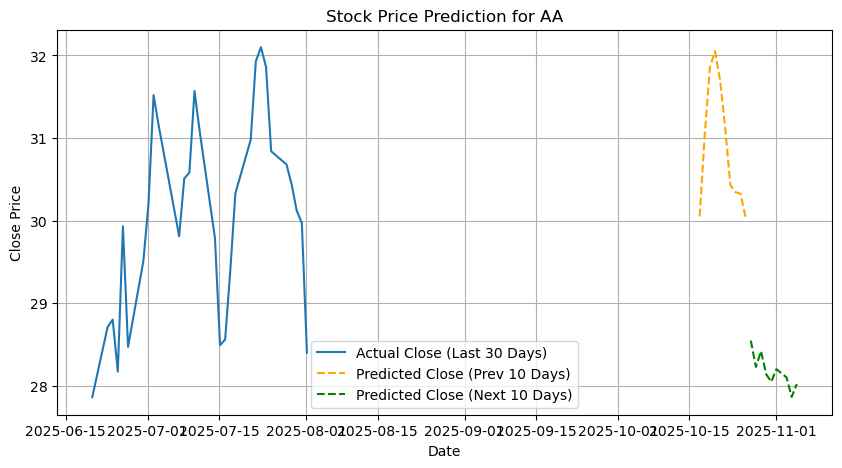

In [26]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime, timedelta

# --- CONFIG ---
FOLDER_PATH = r"C:\Users\asus\Documents\STOCKS\all_companies_csv"

# --- STEP 1: List available company files ---
def list_companies(folder_path):
    files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    companies = [os.path.splitext(f)[0] for f in files]
    return companies

# --- STEP 2: Load company data ---
def load_company_data(company_name):
    file_path = os.path.join(FOLDER_PATH, f"{company_name}.csv")
    df = pd.read_csv(file_path)
    if 'timestamp' in df.columns:
        df['Date'] = pd.to_datetime(df['timestamp'], unit='ms')
    elif 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
    else:
        raise ValueError("CSV must have 'timestamp' or 'Date' column")
    df = df.sort_values('Date')
    df.set_index('Date', inplace=True)
    return df

# --- STEP 3: Train SARIMA model and make predictions ---
def predict_stock(df, company_name):
    if 'close' not in df.columns:
        raise ValueError("CSV must contain a 'close' column with closing prices.")

    data = df['close']

    # Fit SARIMA model
    model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7), enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit(disp=False)

    current_date = datetime.now().date()

    # Predict previous 10 days
    prev_10_days = pd.date_range(end=current_date - timedelta(days=1), periods=10)
    prev_forecast = results.get_prediction(start=len(data)-10, end=len(data)-1)
    prev_pred = prev_forecast.predicted_mean

    # Predict next 10 days
    next_10_days = pd.date_range(start=current_date, periods=10)
    next_forecast = results.get_forecast(steps=10)
    next_pred = next_forecast.predicted_mean

    # Print previous 10 days prediction
    print(f"\n--- Previous 10 Days Predicted Stock Prices for {company_name} ---")
    prev_df = pd.DataFrame({'Date': prev_10_days, 'Predicted Close': prev_pred.values})
    print(prev_df.to_string(index=False))

    # Print next 10 days prediction
    print(f"\n--- Next 10 Days Predicted Stock Prices for {company_name} ---")
    next_df = pd.DataFrame({'Date': next_10_days, 'Predicted Close': next_pred.values})
    print(next_df.to_string(index=False))

    # Plot results
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(data[-30:], label='Actual Close (Last 30 Days)')
    ax.plot(prev_df['Date'], prev_df['Predicted Close'], label='Predicted Close (Prev 10 Days)', color='orange', linestyle='--')
    ax.plot(next_df['Date'], next_df['Predicted Close'], label='Predicted Close (Next 10 Days)', color='green', linestyle='--')
    ax.set_title(f"Stock Price Prediction for {company_name}")
    ax.set_xlabel('Date')
    ax.set_ylabel('Close Price')
    ax.legend()
    ax.grid()
    plt.show()

# --- MAIN EXECUTION ---
if __name__ == "__main__":
    companies = list_companies(FOLDER_PATH)
    if not companies:
        print("No CSV files found in the specified folder.")
    else:
        print("Available Companies:")
        for i, company in enumerate(companies, start=1):
            print(f"{i}. {company}")

        user_input = input("\nEnter the company name you want to analyze (case-sensitive): ").strip()

        if user_input not in companies:
            print(f"\nError: '{user_input}' not found in the folder. Please enter a valid company name.")
        else:
            df = load_company_data(user_input)
            predict_stock(df, user_input)
